<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); color: white; padding: 40px; margin: -10px -10px 20px -10px; border-radius: 0 0 15px 15px;">
<h1 style="margin: 0; font-size: 2.5em;">Packaging & Board Design</h1>
<p style="margin: 10px 0 0 0; font-size: 1.2em; opacity: 0.9;">Week 4, Session 1 — Fab Futures</p>
</div>

## Contents

1. [Why Packaging Matters](#1-why-packaging-matters)
2. [Package Types](#2-package-types)
3. [Wirebonding](#3-wirebonding)
4. [Eval Board Design](#4-eval-board-design)
5. [Power Integrity](#5-power-integrity)
6. [I/O Voltage Levels](#6-io-voltage-levels)
7. [Bring-Up & Testing](#7-bring-up--testing)
8. [Debug Techniques](#8-debug-techniques)

In [1]:
# Setup
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, Circle, Rectangle, FancyArrowPatch
import numpy as np

print("Setup complete.")

Setup complete.


---
<a id="1-chip-packaging-overview"></a>
# 1. Chip Packaging Overview
---

### Why Package a Chip?

The silicon die is tiny and fragile. Packaging provides:

| Function | Description |
|----------|-------------|
| **Protection** | Mechanical, chemical, thermal protection |
| **Connectivity** | Route signals from tiny pads to solderable pins |
| **Heat dissipation** | Remove heat from the die |
| **Handling** | Makes the chip easy to place on a board |

### From Wafer to Package

```
Wafer → Dicing → Die Attach → Wirebond → Encapsulation → Test
```

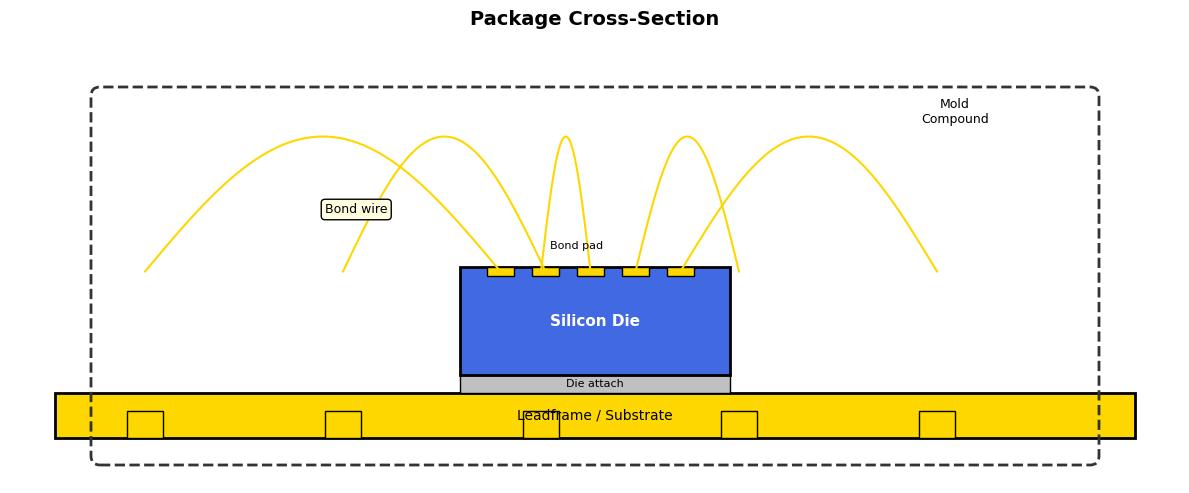

In [2]:
# Package cross-section
fig, ax = plt.subplots(figsize=(12, 6))

# Leadframe / substrate
ax.add_patch(Rectangle((0, 0), 12, 0.5, facecolor='#FFD700', edgecolor='black', linewidth=2))
ax.text(6, 0.25, 'Leadframe / Substrate', ha='center', va='center', fontsize=10)

# Die attach
ax.add_patch(Rectangle((4.5, 0.5), 3, 0.2, facecolor='#C0C0C0', edgecolor='black'))
ax.text(6, 0.6, 'Die attach', ha='center', va='center', fontsize=8)

# Die
ax.add_patch(Rectangle((4.5, 0.7), 3, 1.2, facecolor='#4169E1', edgecolor='black', linewidth=2))
ax.text(6, 1.3, 'Silicon Die', ha='center', va='center', fontsize=11, color='white', fontweight='bold')

# Bond pads on die
for i in range(5):
    x = 4.8 + i * 0.5
    ax.add_patch(Rectangle((x, 1.8), 0.3, 0.1, facecolor='gold', edgecolor='black'))

# Wirebonds
for i in range(5):
    x_die = 4.95 + i * 0.5
    x_lead = 1 + i * 2.2
    # Curved wirebond
    t = np.linspace(0, 1, 50)
    x = x_die + (x_lead - x_die) * t
    y = 1.85 + 1.5 * np.sin(np.pi * t)
    ax.plot(x, y, 'gold', linewidth=1.5)

# Lead fingers
for i in range(5):
    x = 1 + i * 2.2
    ax.add_patch(Rectangle((x - 0.2, 0), 0.4, 0.3, facecolor='#FFD700', edgecolor='black'))

# Mold compound outline
ax.add_patch(FancyBboxPatch((0.5, -0.2), 11, 4, boxstyle="round,pad=0.1",
             facecolor='none', edgecolor='#333', linewidth=2, linestyle='--'))
ax.text(10, 3.5, 'Mold\nCompound', ha='center', fontsize=9)

# Labels
ax.annotate('Bond wire', xy=(3, 2.5), fontsize=9,
           bbox=dict(boxstyle='round', facecolor='lightyellow'))
ax.annotate('Bond pad', xy=(5.5, 2.1), fontsize=8)

ax.set_xlim(-0.5, 12.5)
ax.set_ylim(-0.5, 4.5)
ax.set_aspect('equal')
ax.set_title('Package Cross-Section', fontsize=14, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()

---
<a id="2-package-types"></a>
# 2. Package Types
---

### Through-Hole Packages (older, easier to prototype)

| Package | Pins | Notes |
|---------|------|-------|
| **DIP** (Dual In-line) | 8-64 | Breadboard-friendly! |
| **SIP** (Single In-line) | 4-24 | Memory modules |
| **PGA** (Pin Grid Array) | 100+ | Old CPUs |

### Surface Mount Packages (modern)

| Package | Pins | Notes |
|---------|------|-------|
| **SOIC** | 8-28 | Standard small outline |
| **QFP** (Quad Flat Pack) | 32-200+ | Leads on 4 sides |
| **QFN** (Quad Flat No-lead) | 8-100+ | No leads, just pads |
| **BGA** (Ball Grid Array) | 100-1000+ | Balls underneath |

### For Our Class

Educational tapeouts often use:
- **QFN** packages (small, easy to route)
- **Bare die** on carrier boards
- **Chip-on-board** (wirebond directly to PCB)

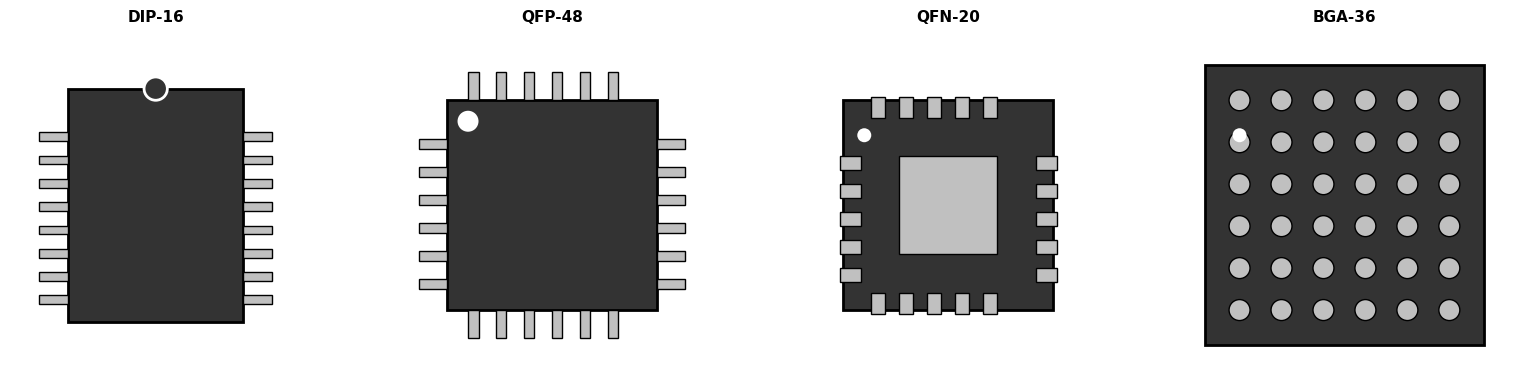

In [3]:
# Package types visualization
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# DIP
ax = axes[0]
ax.add_patch(Rectangle((1, 1), 3, 4, facecolor='#333', edgecolor='black', linewidth=2))
for i in range(8):
    ax.add_patch(Rectangle((0.5, 1.3 + i*0.4), 0.5, 0.15, facecolor='#C0C0C0', edgecolor='black'))
    ax.add_patch(Rectangle((4, 1.3 + i*0.4), 0.5, 0.15, facecolor='#C0C0C0', edgecolor='black'))
# Notch
ax.add_patch(Circle((2.5, 5), 0.2, facecolor='#333', edgecolor='white', linewidth=2))
ax.set_xlim(0, 5)
ax.set_ylim(0, 6)
ax.set_title('DIP-16', fontsize=11, fontweight='bold')
ax.set_aspect('equal')
ax.axis('off')

# QFP
ax = axes[1]
ax.add_patch(Rectangle((1, 1), 3, 3, facecolor='#333', edgecolor='black', linewidth=2))
for i in range(6):
    # Top/bottom
    ax.add_patch(Rectangle((1.3 + i*0.4, 4), 0.15, 0.4, facecolor='#C0C0C0', edgecolor='black'))
    ax.add_patch(Rectangle((1.3 + i*0.4, 0.6), 0.15, 0.4, facecolor='#C0C0C0', edgecolor='black'))
    # Left/right
    ax.add_patch(Rectangle((0.6, 1.3 + i*0.4), 0.4, 0.15, facecolor='#C0C0C0', edgecolor='black'))
    ax.add_patch(Rectangle((4, 1.3 + i*0.4), 0.4, 0.15, facecolor='#C0C0C0', edgecolor='black'))
ax.add_patch(Circle((1.3, 3.7), 0.15, facecolor='white'))
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_title('QFP-48', fontsize=11, fontweight='bold')
ax.set_aspect('equal')
ax.axis('off')

# QFN
ax = axes[2]
ax.add_patch(Rectangle((1, 1), 3, 3, facecolor='#333', edgecolor='black', linewidth=2))
for i in range(5):
    ax.add_patch(Rectangle((1.4 + i*0.4, 0.95), 0.2, 0.3, facecolor='#C0C0C0', edgecolor='black'))
    ax.add_patch(Rectangle((1.4 + i*0.4, 3.75), 0.2, 0.3, facecolor='#C0C0C0', edgecolor='black'))
    ax.add_patch(Rectangle((0.95, 1.4 + i*0.4), 0.3, 0.2, facecolor='#C0C0C0', edgecolor='black'))
    ax.add_patch(Rectangle((3.75, 1.4 + i*0.4), 0.3, 0.2, facecolor='#C0C0C0', edgecolor='black'))
# Thermal pad
ax.add_patch(Rectangle((1.8, 1.8), 1.4, 1.4, facecolor='#C0C0C0', edgecolor='black'))
ax.add_patch(Circle((1.3, 3.5), 0.1, facecolor='white'))
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_title('QFN-20', fontsize=11, fontweight='bold')
ax.set_aspect('equal')
ax.axis('off')

# BGA
ax = axes[3]
ax.add_patch(Rectangle((0.5, 0.5), 4, 4, facecolor='#333', edgecolor='black', linewidth=2))
for i in range(6):
    for j in range(6):
        ax.add_patch(Circle((1 + i*0.6, 1 + j*0.6), 0.15, facecolor='#C0C0C0', edgecolor='black'))
ax.add_patch(Circle((1, 3.5), 0.1, facecolor='white'))
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_title('BGA-36', fontsize=11, fontweight='bold')
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.show()

---
<a id="3-wirebonding"></a>
# 3. Wirebonding
---

**Wirebonding** connects the die pads to the package leads using thin gold or aluminum wires.

### Wirebond Characteristics

| Parameter | Typical Value | Why It Matters |
|-----------|---------------|----------------|
| **Wire diameter** | 18-50 µm | Thicker = more current, but harder to bond |
| **Loop height** | 75-200 µm | Must clear die features; affects inductance |
| **Bond pad size** | 50-100 µm | Must match your design's pad size |
| **Wire length** | < 5 mm typical | Longer = more inductance, resistance |

### Wirebond Diagram

For your design, you need to specify:
- Which die pad connects to which package pin
- Power (VDD) and Ground (GND) assignments
- Any special requirements (short wires for high-speed signals)

**Tip**: Keep power/ground pads on opposite sides of the die from signal pads to simplify routing and reduce noise coupling.

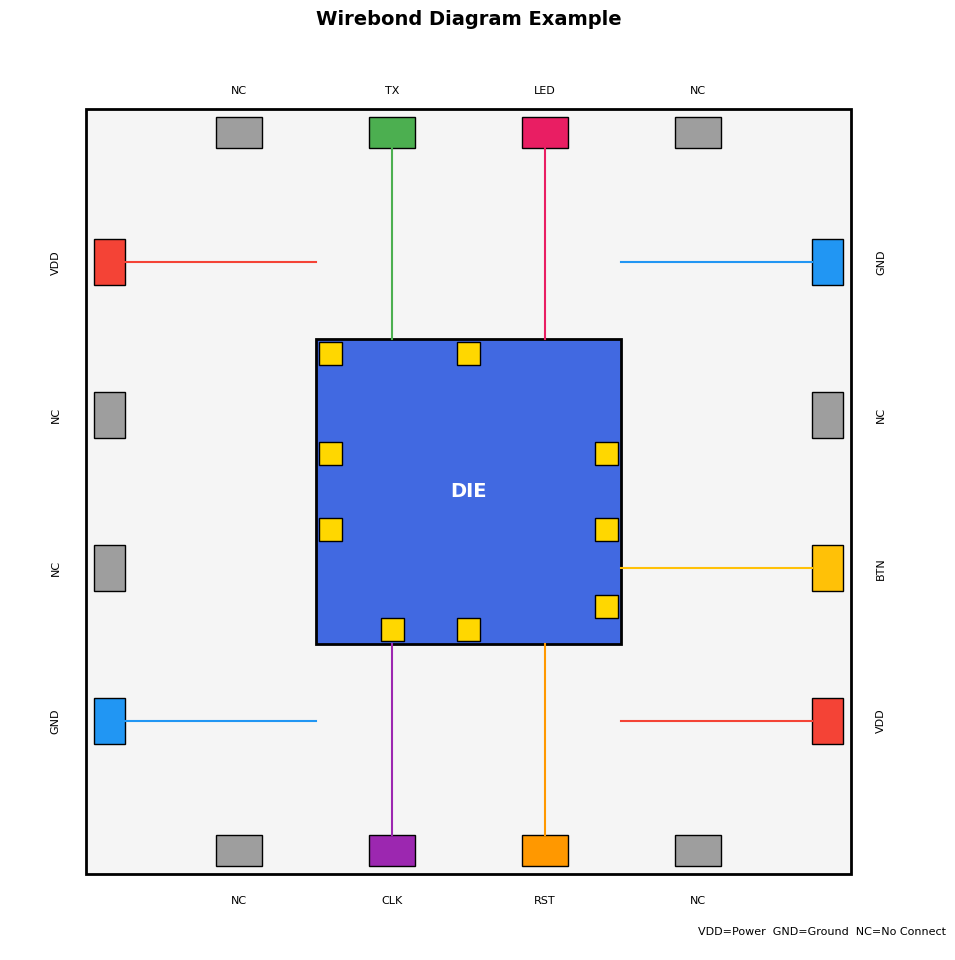

In [4]:
# Wirebond diagram example
fig, ax = plt.subplots(figsize=(10, 10))

# Package outline
ax.add_patch(Rectangle((0, 0), 10, 10, facecolor='#F5F5F5', edgecolor='black', linewidth=2))

# Die
ax.add_patch(Rectangle((3, 3), 4, 4, facecolor='#4169E1', edgecolor='black', linewidth=2))
ax.text(5, 5, 'DIE', ha='center', va='center', fontsize=14, color='white', fontweight='bold')

# Package pins (simplified - 4 per side)
pin_labels = {
    'top': ['NC', 'TX', 'LED', 'NC'],
    'right': ['VDD', 'BTN', 'NC', 'GND'],
    'bottom': ['NC', 'CLK', 'RST', 'NC'],
    'left': ['GND', 'NC', 'NC', 'VDD']
}

colors = {'VDD': '#F44336', 'GND': '#2196F3', 'CLK': '#9C27B0', 
          'RST': '#FF9800', 'TX': '#4CAF50', 'BTN': '#FFC107', 
          'LED': '#E91E63', 'NC': '#9E9E9E'}

# Top pins
for i, label in enumerate(pin_labels['top']):
    x = 2 + i * 2
    ax.add_patch(Rectangle((x - 0.3, 9.5), 0.6, 0.4, facecolor=colors[label], edgecolor='black'))
    ax.text(x, 10.2, label, ha='center', fontsize=8)
    if label != 'NC':
        ax.plot([x, x], [9.5, 7], colors[label], linewidth=1.5)

# Bottom pins
for i, label in enumerate(pin_labels['bottom']):
    x = 2 + i * 2
    ax.add_patch(Rectangle((x - 0.3, 0.1), 0.6, 0.4, facecolor=colors[label], edgecolor='black'))
    ax.text(x, -0.4, label, ha='center', fontsize=8)
    if label != 'NC':
        ax.plot([x, x], [0.5, 3], colors[label], linewidth=1.5)

# Left pins
for i, label in enumerate(pin_labels['left']):
    y = 2 + i * 2
    ax.add_patch(Rectangle((0.1, y - 0.3), 0.4, 0.6, facecolor=colors[label], edgecolor='black'))
    ax.text(-0.4, y, label, ha='center', va='center', fontsize=8, rotation=90)
    if label != 'NC':
        ax.plot([0.5, 3], [y, y], colors[label], linewidth=1.5)

# Right pins
for i, label in enumerate(pin_labels['right']):
    y = 2 + i * 2
    ax.add_patch(Rectangle((9.5, y - 0.3), 0.4, 0.6, facecolor=colors[label], edgecolor='black'))
    ax.text(10.4, y, label, ha='center', va='center', fontsize=8, rotation=90)
    if label != 'NC':
        ax.plot([9.5, 7], [y, y], colors[label], linewidth=1.5)

# Die pads (simplified)
die_pads = [
    (3.2, 6.8, 'TX'), (5, 6.8, 'LED'),
    (6.8, 5.5, 'VDD'), (6.8, 4.5, 'BTN'),
    (6.8, 3.5, 'GND'),
    (5, 3.2, 'CLK'), (4, 3.2, 'RST'),
    (3.2, 4.5, 'GND'), (3.2, 5.5, 'VDD'),
]

for x, y, label in die_pads:
    ax.add_patch(Rectangle((x - 0.15, y - 0.15), 0.3, 0.3, 
                           facecolor='gold', edgecolor='black'))

ax.set_xlim(-1, 11)
ax.set_ylim(-1, 11)
ax.set_aspect('equal')
ax.set_title('Wirebond Diagram Example', fontsize=14, fontweight='bold')
ax.axis('off')

# Legend
ax.text(8, -0.8, 'VDD=Power  GND=Ground  NC=No Connect', fontsize=8)

plt.tight_layout()
plt.show()

---
<a id="4-evaluation-board-design"></a>
# 4. Evaluation Board Design
---

An **evaluation board** (eval board) lets you test your chip by providing:

| Feature | Purpose |
|---------|--------|
| **Power supply** | Clean VDD and GND |
| **Decoupling capacitors** | Filter power noise |
| **Clock source** | Crystal or oscillator |
| **Reset circuit** | Power-on reset |
| **I/O connectors** | Access to chip pins |
| **Debug headers** | Logic analyzer, JTAG |

### Typical Eval Board Components

```
┌─────────────────────────────────────────┐
│  ┌─────┐                     ┌────────┐ │
│  │Power│    ┌─────────┐      │USB-UART│ │
│  │ In  │    │         │      │ Bridge │ │
│  └──┬──┘    │  YOUR   │      └───┬────┘ │
│     │       │  CHIP   │          │      │
│  ┌──┴──┐    │         │      ┌───┴───┐  │
│  │Vreg │    └────┬────┘      │Headers│  │
│  └─────┘         │           └───────┘  │
│           ┌──────┼──────┐               │
│           │Decap │ Xtal │               │
│           └──────┴──────┘               │
└─────────────────────────────────────────┘
```

### KiCad for PCB Design

[KiCad](https://www.kicad.org/) is a free, open-source PCB design tool.

**Basic workflow:**
1. **Schematic** - Draw circuit connections
2. **Footprints** - Assign physical package shapes
3. **Layout** - Place components and route traces
4. **Gerbers** - Export manufacturing files

**PCB fabs for prototypes:**
- JLCPCB (~$2 for 5 boards)
- PCBWay
- OSH Park (purple boards!)

---
<a id="5-power-integrity"></a>
# 5. Power Integrity
---

**Power integrity** ensures your chip gets clean, stable power. Poor power integrity causes glitches, timing failures, and mysterious bugs.

### The Problem

When digital circuits switch, they draw sudden bursts of current:

```
    VDD ─────────────────────
         ↑ Wire inductance (L)
         │
         ↓ Decoupling cap (C)
    Chip ────┬────┬────┬────
             │    │    │
           [FF] [FF] [FF]
             ↓    ↓    ↓
           Switching current
```

Without decoupling: the wire inductance causes **voltage droop** when current suddenly increases.

### Decoupling Capacitors

Place capacitors near the chip to supply instantaneous current:

| Capacitor | Purpose | Placement |
|-----------|---------|-----------|
| **100 nF (0.1 µF)** | High-frequency noise | Very close to VDD/GND pins |
| **1 µF** | Medium-frequency | Near chip |
| **10 µF** | Bulk storage | Anywhere on board |
| **100+ µF** | Low-frequency | Near power input |

### Sizing Rule of Thumb

For our educational designs:

| Design Current | Recommended Decoupling |
|----------------|----------------------|
| < 10 mA | 1 × 100 nF + 1 × 1 µF |
| 10-50 mA | 2 × 100 nF + 1 × 10 µF |
| > 50 mA | Multiple caps, careful layout |

**Our projects draw < 5 mA** (at 50 MHz, ~500 cells), so minimal decoupling is fine. Two 100 nF caps near VDD/GND pins plus one 10 µF bulk cap is plenty.

### Power Budget Example

Before testing, estimate what your chip should draw:

| Component | Current | Notes |
|-----------|---------|-------|
| Core logic (~500 cells @ 50 MHz) | ~1-2 mA | Dynamic + leakage |
| I/O pads (driving loads) | ~0.1-1 mA per output | Depends on load capacitance |
| External peripherals | varies | Check datasheets |

**Fortune Teller example:**
- Core: ~1 mA
- UART output: ~0.1 mA (light load)
- LED: 1-5 mA (through current-limiting resistor)
- **Total: ~3-6 mA @ 1.8V = ~6-11 mW**

If your chip draws significantly more than expected, check for:
- Short circuits (VDD to GND)
- Oscillation (unused inputs floating)
- Wrong voltage level

### Layout Tips

1. **Keep decoupling caps close** - Place 100 nF within 5mm of VDD/GND pins
2. **Short, fat traces** for power - Minimize resistance and inductance
3. **Ground plane** - Use a solid copper pour for GND if possible
4. **Separate analog and digital grounds** - Join at one point near power input
5. **Check current capacity** - 10 mil (0.25mm) trace handles ~0.5A; our designs need much less

---
<a id="6-io-voltage-levels"></a>
# 6. I/O Voltage Levels
---

Your chip runs at **1.8V** (Sky130's core voltage), but many peripherals use **3.3V** or **5V**. This mismatch requires **level shifting**.

### Voltage Standards

| Standard | Voltage | Common Uses |
|----------|---------|-------------|
| **1.8V LVCMOS** | 1.8V | Sky130 core I/O |
| **3.3V LVCMOS** | 3.3V | Arduino, many sensors |
| **5V TTL** | 5V | Legacy devices, Raspberry Pi GPIO |
| **1.2V** | 1.2V | Advanced nodes (65nm, 28nm) |

### Threshold Levels

For reliable communication, signals must meet these thresholds:

| Standard | VIL (max) | VIH (min) | VOL (max) | VOH (min) |
|----------|-----------|-----------|-----------|-----------|
| **1.8V CMOS** | 0.35V | 1.17V | 0.4V | 1.4V |
| **3.3V CMOS** | 0.8V | 2.0V | 0.4V | 2.4V |
| **5V TTL** | 0.8V | 2.0V | 0.5V | 2.4V |

### Compatibility Matrix

Can your 1.8V chip talk to 3.3V or 5V devices directly?

**1.8V driving 3.3V input:**
- VOH (1.8V) = 1.4V, VIH (3.3V) = 2.0V
- **1.4V < 2.0V = DOESN'T WORK!** (logic high not recognized)

**3.3V driving 1.8V input:**
- VOH (3.3V) = 2.4V, VIH (1.8V) = 1.17V
- **2.4V > 1.17V = Works BUT...**
- **2.4V > 1.8V = May DAMAGE chip!** (exceeds VDD)

### Level Shifting Solutions

| Method | Use Case | Cost |
|--------|----------|------|
| **Resistor divider** | 3.3V → 1.8V input (slow signals only) | Very low |
| **N-MOSFET shifter** | Bidirectional, open-drain | Low |
| **Level shifter IC** | High-speed, many signals | Medium |
| **Buffer with VDD = 1.8V** | 1.8V → 3.3V (if 5V tolerant) | Medium |

### Resistor Divider (Inputs Only)

For slow signals like buttons or switches:

```
3.3V signal ──┬── R1 (10k) ──┬── 1.8V input
              │              │
              └── R2 (18k) ──┴── GND

Vout = 3.3V × 18k/(10k+18k) = 2.1V  (add more R1 or less R2)
```

Better values for 1.8V output:
- R1 = 10k, R2 = 12k → Vout = 1.8V

**Warning**: Only works for inputs! Cannot drive outputs through a divider.

### N-MOSFET Bidirectional Shifter

Works for I2C and similar open-drain protocols:

```
         VDD_HIGH (3.3V)      VDD_LOW (1.8V)
              │                    │
           ┌──┴──┐              ┌──┴──┐
           │ 10k │              │ 10k │
           └──┬──┘              └──┬──┘
              │                    │
              └───── Drain  Source ┘
                       │      │
               Gate ───┴──────┘
                       │
                   VDD_LOW (1.8V)
```

When LOW side pulls down, HIGH side follows. When released, pullups return to their respective VDDs.

### Level Shifter ICs

For high-speed or many signals, use a dedicated IC:

| Part | Voltage | Channels | Speed |
|------|---------|----------|-------|
| TXB0104 | 1.2V-3.6V | 4 | 100 Mbps |
| SN74LVC4245 | 1.65V-5.5V | 8 | 50 MHz |
| LSF0102 | 1V-3.6V | 2 | 400 kHz (I2C) |

### Our Designs

Sky130 includes **3.3V I/O pads** (`sky130_fd_io`) that can interface directly with 3.3V logic. If your design uses these, no external level shifter is needed for 3.3V peripherals.

Check your I/O cell choice:
- `sky130_ef_io__gpiov2_pad_wrapped` - 3.3V tolerant
- Core cells (1.8V only) - need level shifting

### Quick Decision Guide

| Scenario | Solution |
|----------|----------|
| 1.8V chip ↔ 3.3V Arduino | Level shifter IC or resistor divider for inputs |
| 1.8V chip ↔ 5V Raspberry Pi | Level shifter IC (bidirectional) |
| 1.8V chip → 3.3V LED | Direct connection OK (LED just needs current) |
| 3.3V sensor → 1.8V chip | Resistor divider (slow) or shifter (fast) |

---
<a id="7-bring-up--testing"></a>
# 7. Bring-Up & Testing
---

### Test Setup

| Equipment | Purpose |
|-----------|--------|
| **Power supply** | Provide VDD (often 1.8V or 3.3V) |
| **Multimeter** | Measure voltage, current |
| **Oscilloscope** | See digital signals |
| **Logic analyzer** | Capture many digital signals |
| **USB-UART adapter** | Serial communication with laptop |

### Test Plan Template

1. **Power-up test**
   - Does the chip draw expected current?
   - No smoke? (seriously, check this first!)

2. **Basic functionality**
   - Does reset work?
   - Can you see clock activity?
   - Do outputs toggle?

3. **Feature tests**
   - Test each feature of your design
   - Compare to simulation results

### For Our Projects

| Project | Test Method |
|---------|-------------|
| **Fortune Teller** | Press button, see output on serial terminal |
| **Pocket Synth** | Press keys, listen to speaker |
| **Dice Roller** | Press button, see 7-segment display |
| **Morse Beacon** | Power up, see LEDs flash Morse code |

---
<a id="8-debug-techniques"></a>
# 8. Debug Techniques
---

### When Things Don't Work

| Symptom | Check |
|---------|-------|
| **No power** | Solder joints, voltage at pins |
| **High current** | Short circuit, wrong voltage |
| **No activity** | Clock, reset, enable signals |
| **Wrong output** | Input values, state machine |
| **Glitchy output** | Power supply noise, timing |

### Debug Strategies

1. **Divide and conquer**
   - Isolate which block is failing
   - Test inputs and outputs of each block

2. **Compare to simulation**
   - Apply same inputs as testbench
   - Do outputs match?

3. **Add observability**
   - Route internal signals to spare pins
   - Add debug registers (if you planned ahead!)

### Design for Debug (DFD)

Plan ahead in your design:
- **Spare I/O pins** for probing internal signals
- **Bypass modes** to isolate blocks
- **Status registers** readable via serial

---
<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); color: white; padding: 30px; margin: 20px -10px -10px -10px; border-radius: 15px 15px 0 0; text-align: center;">

## Summary

- **Packaging** protects the die and provides connectivity
- **Wirebonding** connects die pads to package pins
- **Eval boards** provide power, clock, and I/O access
- **Testing** verifies your chip works in silicon
- **Debug** requires planning and systematic approach

### Homework
1. Run final DRC/LVS on your design
2. Document your pin assignments
3. Create a test plan
4. Prepare your presentation for Thursday!

</div>